In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

#set font sizes for figures throughout
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)

palette = sns.color_palette()
scale = 1.0

In [2]:
import data_reader
dr = data_reader.DataReader()

# if Exp1 and Exp2 data need to be plotted alongside each other, read those data into separate dataframes
exp_1, exp_2 = 'HEM_exp_1', 'HEM_exp_2'
choices_1, dynamics_1, stim_viewing_1 = dr.get_data(path='../../data/%s/processed/' % (exp_1), stim_viewing=True)
choices_2, dynamics_2, stim_viewing_2 = dr.get_data(path='../../data/%s/processed/' % (exp_2), stim_viewing=True)

First, let's look at mouse initation times for each coherence level

0 trials discarded due to no movements
0 trials discarded due to no movements


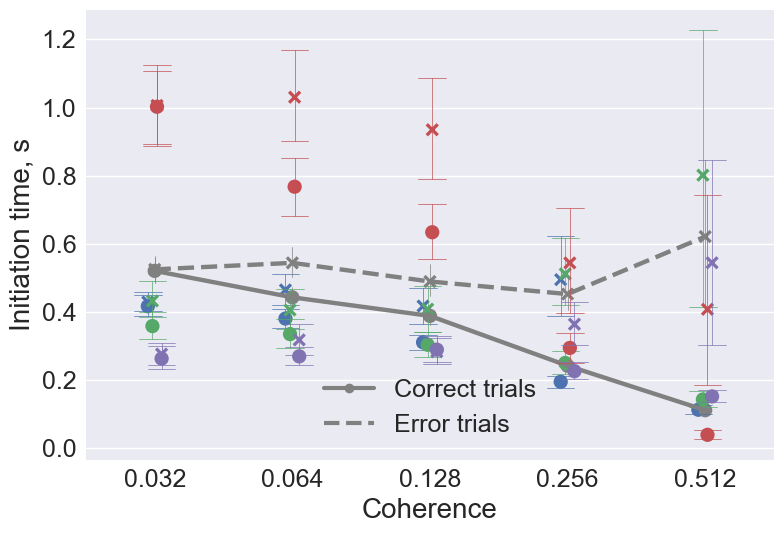

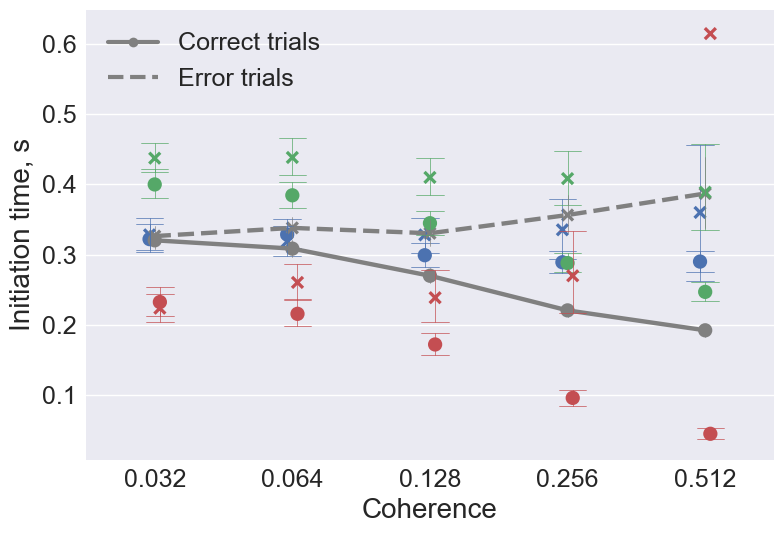

In [5]:
import matplotlib.lines as mlines

def plot_IT_vs_coherence(choices, exp, var):
    to_discard = (choices[var] == np.inf)
    choices = choices[~to_discard]
    print('%i trials discarded due to no movements' % (to_discard.sum()))
    
    choices['subj_id'] = choices.index.get_level_values('subj_id')
    subj_order = sorted(choices.subj_id.unique())    
    
    
    plt.figure()
    
    ax = sns.pointplot(data=choices[(choices.is_correct) & (choices.coherence>0)], 
                       x='coherence', y=var, hue='subj_id', 
                       palette=palette, scale=scale, errwidth=0.5, 
                       join=False, dodge=True, capsize=.2, hue_order=subj_order)
    
    ax = sns.pointplot(data=choices[(~choices.is_correct) & (choices.coherence>0)], 
                       x='coherence', y=var, hue='subj_id', 
                       palette=palette, linestyles=['--', '--', '--', '--'], 
                       markers=['x', 'x', 'x', 'x'], scale=scale, 
                       errwidth=0.5, dodge=True, capsize=.2, join=False, 
                       hue_order=subj_order, ax=ax)

    ax = sns.pointplot(data=choices[(choices.coherence>0) & (choices.is_correct)],
                       x='coherence', y=var, linestyles=['-'], color='grey', 
                       scale=scale, errwidth=0.5, ax=ax)

    ax = sns.pointplot(data=choices[(choices.coherence>0) & (~choices.is_correct)], 
                       x='coherence', y=var, linestyles=['--'], color='grey',
                       markers=['x'], scale=scale, errwidth=0.5, ax=ax)
#     ax.set_ylim([0, 1.2])      
    ax.set_xlabel('Coherence')
    ax.set_ylabel('Initiation time, s')
    
    ax.legend_.remove()
    correct_line = mlines.Line2D([], [], color='grey', marker='o', lw=3.0, label='Correct trials')
    error_line = mlines.Line2D([], [], color='grey', marker='x', ls='--', lw=3.0, label='Error trials')
    plt.legend(handles=[correct_line, error_line])

    plt.tight_layout()
    plt.savefig('figures/%s_vs_coherence_ind_%s' % (var, exp))
    
plot_IT_vs_coherence(choices_1, exp_1, var='mouse_IT')
plot_IT_vs_coherence(choices_2, exp_2, var='mouse_IT')

7 trials discarded due to no movements
155 trials discarded due to no movements


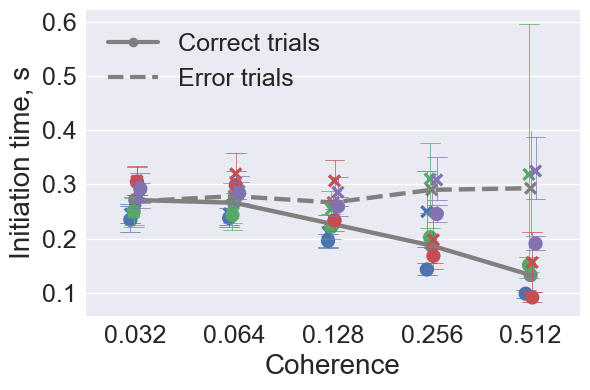

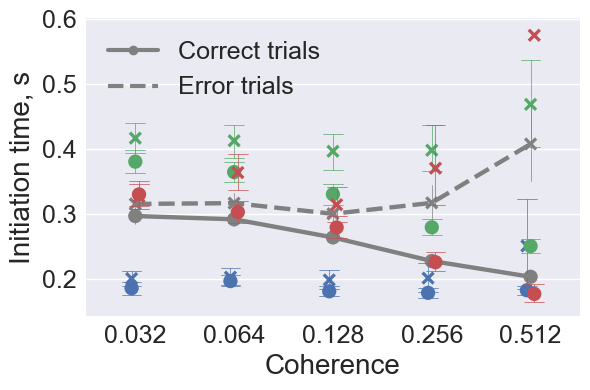

In [8]:
plot_IT_vs_coherence(choices_1, exp_1, var='eye_IT')
plot_IT_vs_coherence(choices_2, exp_2, var='eye_IT')